In [1]:
# To help you get started...
import warnings
warnings.filterwarnings('ignore')
from IPython.display import display
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm

data_1 = pd.read_csv('exampleco_data/machine_2.csv')
data_1.columns = ['Time', '0', '1', '2', '3']
data_1.set_index('Time', inplace=True)
data_1.index = pd.to_datetime(data_1.index)


In [2]:
data_1.head(30)

,0,1,2,3
Time,,,,
2019-01-01 00:00:00.000000000,12.610290,8.824032,-11.811786,10.084184
2019-01-01 08:00:09.603201067,10.818875,2.805791,11.570006,21.915231
2019-01-01 16:00:19.206402134,21.073187,-0.639026,-17.843895,-1.356167
2019-01-02 00:00:28.809603201,32.315311,6.532577,-13.485271,-4.255483
2019-01-02 08:00:38.412804268,28.074548,3.688710,21.986233,13.632604
2019-01-02 16:00:48.016005335,29.642886,-3.529430,3.374834,-3.012019
2019-01-03 00:00:57.619206402,38.901489,1.929028,-10.853453,-17.719997
2019-01-03 08:01:07.222407469,33.058033,3.212169,25.471491,1.124896
2019-01-03 16:01:16.825608536,275.167089,-5.469870,22.945670,-3.460127


In [3]:
# TO-DO: Create a function to plot all 4 time series plots together using subplots.
def plot_time_series(df):
    plt.figure(figsize = (15, 5))
    plt.subplot(2, 2, 1)
    plt.plot((df.index), df['0'])
    plt.subplot(2, 2, 2)
    plt.plot(df.index, df['1'])
    plt.subplot(2, 2, 3)
    plt.plot(df.index, df['2'])
    plt.subplot(2, 2, 4)
    plt.plot(df.index, df['3'])   

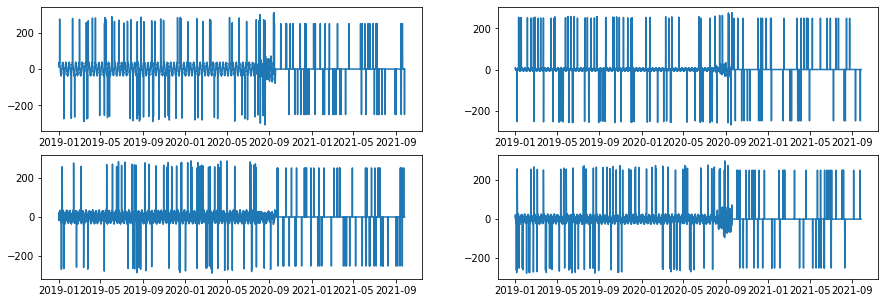

In [4]:
plot_time_series(data_1)

In [5]:
def remove_outliers(df):
    for i in range(4):
        data = df[str(i)]
        up_limit = data.mean() + (2 * data.std())
        down_limit = data.mean() - (2 * data.std())
        for j in range(len(data)): 
            if(data[j] > up_limit or data[j] < down_limit):
                if(j > 5):
                    data[j] = data[j-5:j+5].median()
                else:
                    data[j] = data[j:j+5].median()
        df[str(i)] = data  
    return df        

In [6]:
clean_data_1 = remove_outliers(data_1)

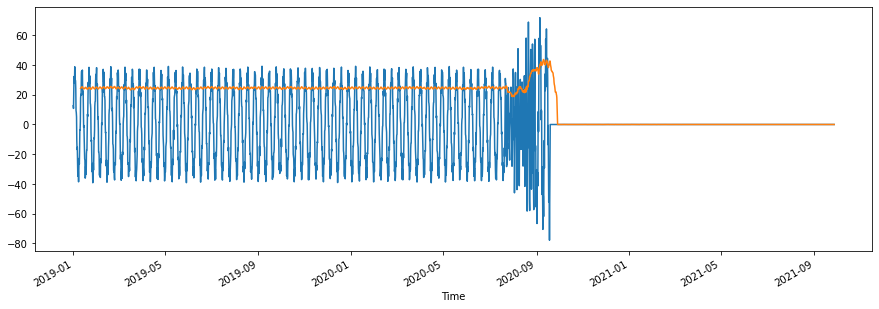

In [7]:
plt.figure(figsize = (15, 5))
clean_data_1['0'].plot()
rm = clean_data_1.rolling(window = 30).std() 
rm['0'].plot()

In [ ]:
# TO-DO: Define find_sudden_change() properly.
def find_sudden_change(df):
    for i in range(60, len(rm), 30):   
    current_win_std = rm[i:i+30]['0'].std()
    if(current_win_std > (1.5 * previous_win_std)):
        print('Breakdown point: ', i)
        plt.figure(figsize = (15, 5))
        clean_data_1['0'].plot()
        rm[i:]['0'].plot()
        plt.title('Faulty Mode: Breakdown Point')
    

Breakdown point:  1710
[]


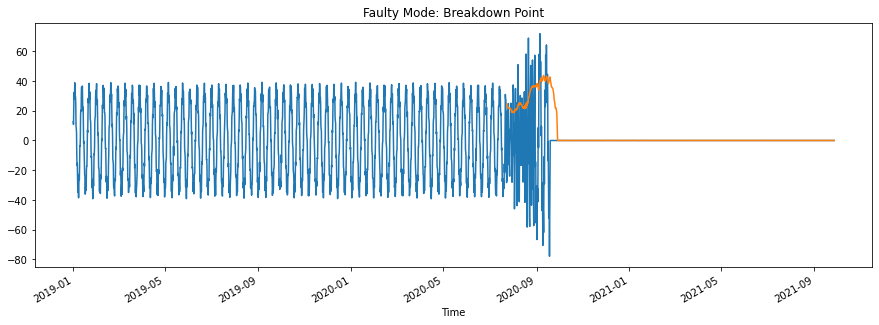

In [14]:
# Initialised with the first window's std.
previous_win_std = np.std(rm[30:60]['0'])

for i in range(60, len(rm), 30):   
    current_win_std = rm[i:i+30]['0'].std()
    if(current_win_std > (1.5 * previous_win_std)):
        print('Breakdown point: ', i)
        plt.figure(figsize = (15, 5))
        clean_data_1['0'].plot()
        rm[i:]['0'].plot()
        plt.title('Faulty Mode: Breakdown Point')
        
        # Failed Mode
        failure_pt = clean_data_1[clean_data_1['0'] == 0].index
        print(failure_pt)
        #print('Failure point: ', i)
        #plt.figure(figsize = (15, 5))
        #clean_data_1['0'].plot()
        #clean_data_1[i:]['0'].plot()
        #plt.title('Failed Mode: Failure Point')
        
        break
    else:
        previous_win_std = current_win_std      

In [9]:
rm['0'].loc[failure_pt]

Time
2021-06-16 15:10:51.817272432    0.006085
Name: 0, dtype: float64

In [10]:
# TO-DO: Write a function for that above code. Extend that for complete failure. 1 function should detect both automatically.